In [15]:
import os
import xarray as xr
import numpy as np
from SMN_tools import get_contour
from SMN_tools import get_cmap_norm
import matplotlib.pyplot as plt
from glob import glob as gb

In [24]:
os.system('mkdir -p figuras')

0

In [16]:
ds=xr.open_dataset('../data/out/06Z/PERU_ETA22_2025010106_prs.nc')

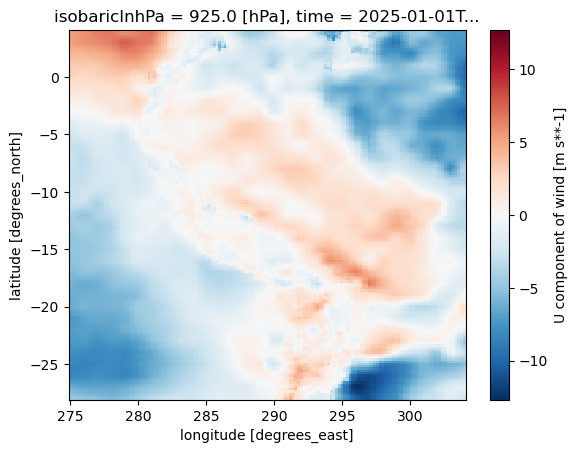

In [17]:
ds['u'][0,0,:,:].plot()
plt.savefig('figuras/generico_muestra.png', dpi=100, bbox_inches='tight', pad_inches=0)

In [18]:
ds=xr.open_dataset('../data/out/06Z/PERU_ETA22_2025010106_sfc.nc')

In [19]:
var_name = "prmsl"                      # o "mslet"
datap = ds[var_name].isel(time=0)*1.01 # primer tiempo
datan = ds[var_name].isel(time=0)*.99 # primer tiempo

# Si está en Pa → convertir a hPa
if datap.max() > 2000:
    datap = datap / 100.0
# Si está en Pa → convertir a hPa
if datan.max() > 2000:
    datan = datan / 100.0
# Obtener cmap, norm y niveles
cmap, norm, clevs = get_cmap_norm(var_name)

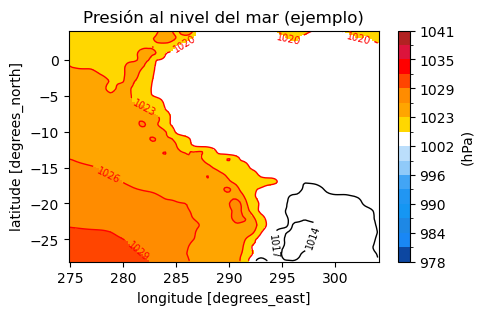

In [20]:
# Crear figura
fig, ax = plt.subplots(figsize=(5,3))
# Plot con xarray
imp = datap.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=True)
imp.colorbar.set_label("(hPa)")
# Añadir contornos de get_contour
contours = get_contour(var_name)
for color, levels in contours.items():
    cs = datap.plot.contour(ax=ax, levels=levels, colors=color, linewidths=1, add_labels=False)
    ax.clabel(cs, fmt="%d", fontsize=7)
ax.set_title("Presión al nivel del mar (ejemplo)")
plt.savefig('figuras/presion1_muestra.png', dpi=100, bbox_inches='tight', pad_inches=0)
plt.show()

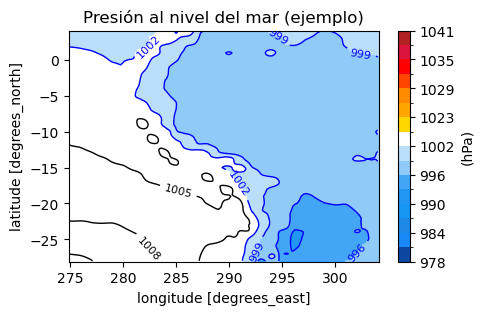

In [21]:
# Crear figura
fig, ax = plt.subplots(figsize=(5,3))
# Plot con xarray
imp = datan.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=True)
imp.colorbar.set_label("(hPa)")
# Añadir contornos de get_contour
contours = get_contour(var_name)
for color, levels in contours.items():
    cs = datan.plot.contour(ax=ax, levels=levels, colors=color, linewidths=1, add_labels=False)
    ax.clabel(cs, fmt="%d", fontsize=8)
ax.set_title("Presión al nivel del mar (ejemplo)")
plt.savefig('figuras/presion2_muestra.png', dpi=100, bbox_inches='tight', pad_inches=0)
plt.show()

In [22]:
var_name = "tp"                      # o "mslet"
datap = ds[var_name].mean('time') # media de tiempo
# Si está en Pa → convertir a hPa
if datap.max() > 273.15:  datap = datap - 273.15
# Obtener cmap, norm y niveles
cmap, norm, clevs = get_cmap_norm(var_name,dataset=datap)

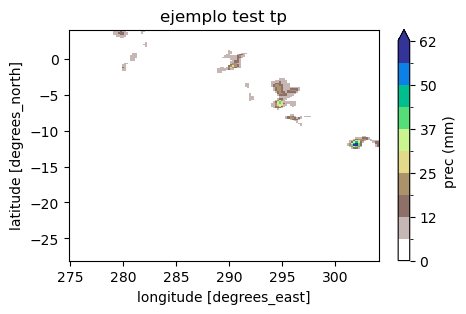

In [23]:
# Crear figura
fig, ax = plt.subplots(figsize=(5,3))
# Plot con xarray
imp = datap.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=True)
imp.colorbar.set_label("prec (mm)")
# Añadir contornos de get_contour
contours = get_contour(var_name)
for color, levels in contours.items():
    #cs = datap.plot.contour(ax=ax, levels=levels, colors=color, linewidths=.4, add_labels=False)
    ax.clabel(cs, fmt="%d", fontsize=6)
ax.set_title("ejemplo test %s"%var_name)
plt.savefig('figuras/otra_var_muestra.png', dpi=100, bbox_inches='tight', pad_inches=0)
plt.show()